In [15]:
from functions import *

In [16]:
genLog= loadLog('general_log.json')
genLog.head(3)

,event_time,user_host,thread_id,server_id,command_type,argument
0,2021-01-14 15:19:54.549896,guest[guest] @ [185.9.209.177],67,97408076,Query,/* ApplicationName=DataGrip 2020.2.3 */ select...
1,2021-01-14 15:19:54.489750,guest[guest] @ [185.9.209.177],67,97408076,Query,/* ApplicationName=DataGrip 2020.2.3 */ SET ne...
2,2021-01-14 15:19:54.430215,guest[guest] @ [185.9.209.177],67,97408076,Query,SHOW WARNINGS


In [19]:
slowLog= loadLog('slow_log.json')
slowLog.head(3)

,start_time,user_host,query_time,lock_time,rows_sent,rows_examined,db,last_insert_id,insert_id,server_id,sql_text,thread_id
0,2021-01-14 15:11:51.815988,guest[guest] @ [185.9.209.177],00:00:00.000093,00:00:00,0,0,tpch,0,0,97408076,/* ApplicationName=DataGrip 2020.2.3 */ SET ne...,67
1,2021-01-14 15:11:51.749969,guest[guest] @ [185.9.209.177],00:00:00.000055,00:00:00,0,0,tpch,0,0,97408076,SHOW WARNINGS,67
2,2021-01-14 15:11:51.687122,guest[guest] @ [185.9.209.177],00:00:00.000076,00:00:00,0,0,tpch,0,0,97408076,SHOW WARNINGS,67


General log timeline is over: 
3:59:00.040352
_______________________________
Slow log timeline is over: 
3:50:57.125391


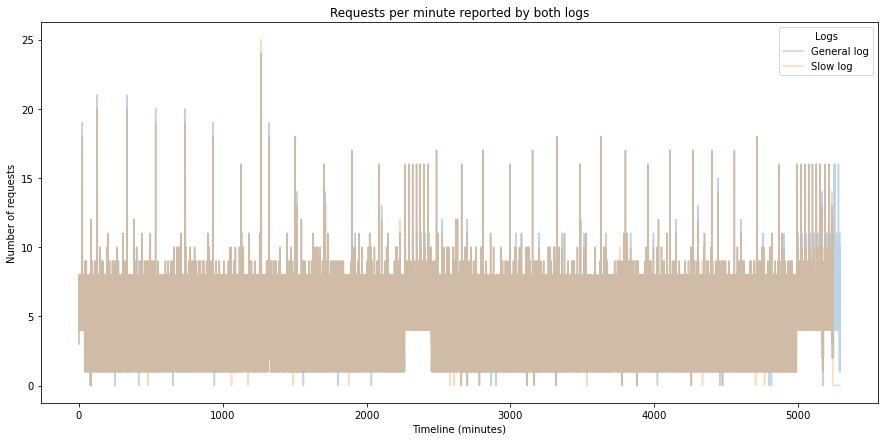

        event_time   start_time
count  5294.000000  5294.000000
mean      3.041368     2.963355
std       3.201051     3.148593
min       0.000000     0.000000
25%       1.000000     1.000000
50%       1.000000     1.000000
75%       4.000000     3.000000
max      24.000000    25.000000


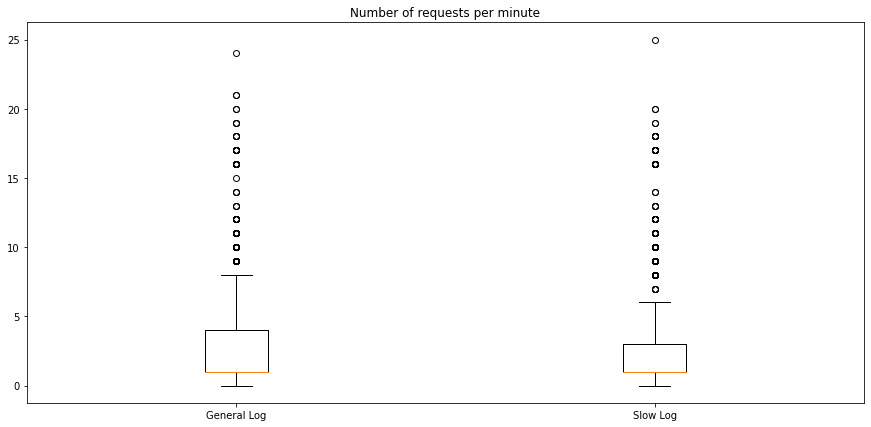

Logs provide 204 different values regarding number of requests per minute
__________________________


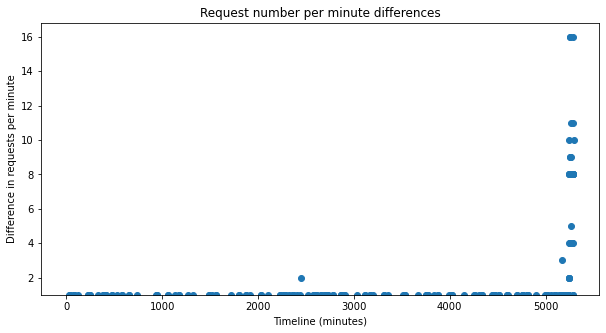

In [20]:
compareDates(genLog,slowLog)

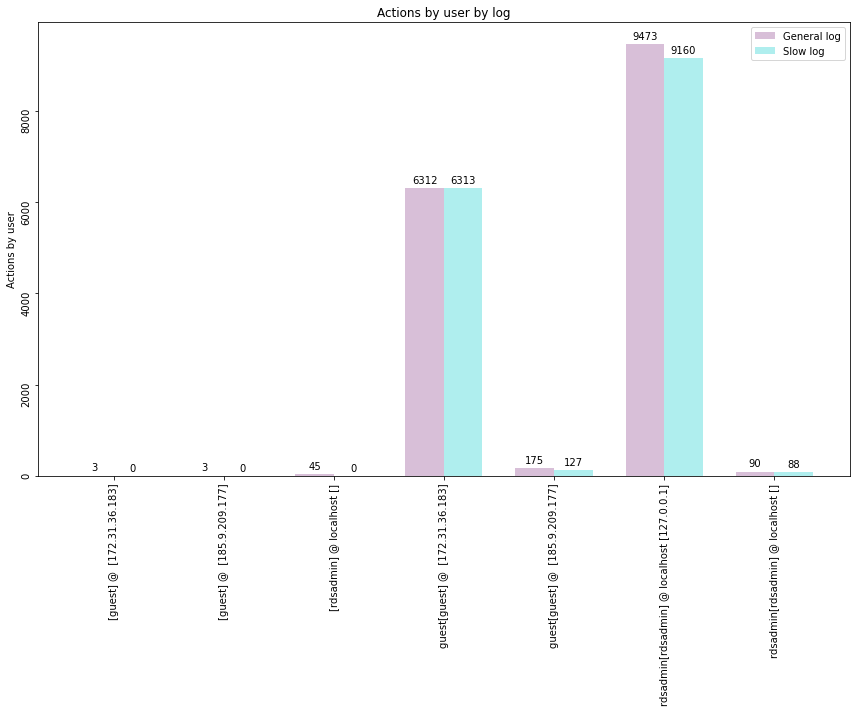

In [6]:
gr1=genLog.groupby(by="user_host").count()
gr2=slowLog.groupby(by="user_host").count()
merged= pd.concat([gr1, gr2], axis=1).fillna(0)
labels = merged.index


gen = merged['event_time']
slow = merged['start_time']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12, 10, forward=True)
rects1 = ax.bar(x - width/2, gen, width, label='General log', color=["thistle"])
rects2 = ax.bar(x + width/2, slow, width, label='Slow log',color=["paleturquoise"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Actions by user')
ax.set_title('Actions by user by log')
ax.set_xticks(x)
ax.tick_params(labelrotation=90)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects1,ax)
autolabel(rects2,ax)
fig.tight_layout()
plt.show()

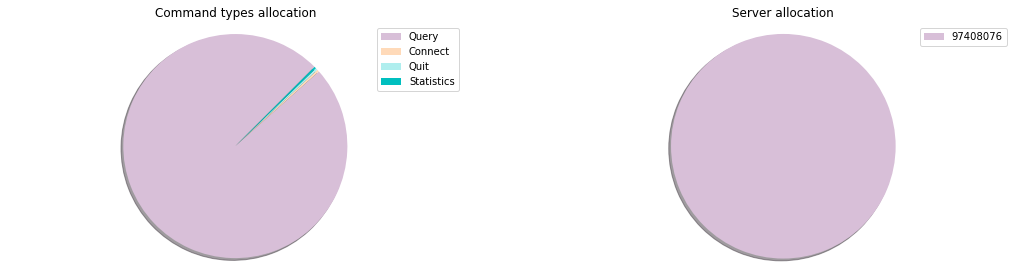

In [7]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
colors=[ "thistle","peachpuff","paleturquoise", "c"]
commandType=genLog["command_type"].value_counts()
ax1.pie(commandType,shadow=True, startangle=45, colors=colors)
ax1.legend(labels=commandType.index)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Command types allocation')
ax1 = plt.subplot2grid((2,2),(0,1))
serverId=genLog["server_id"].value_counts()


ax1.pie(serverId,shadow=True, startangle=45, colors=colors)
ax1.legend(labels=serverId.index)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Server allocation')
plt.show()


## Slow Log Analysis

In [8]:
slowLog['sql_text']=slowLog['sql_text'].apply(lambda x: clean(x))
slowLog.head(3)

,start_time,user_host,query_time,lock_time,rows_sent,rows_examined,db,last_insert_id,insert_id,server_id,sql_text,thread_id
0,2021-01-14 15:11:51.815988,guest[guest] @ [185.9.209.177],00:00:00.000093,00:00:00,0,0,tpch,0,0,97408076,SET net_write_timeout=600,67
1,2021-01-14 15:11:51.749969,guest[guest] @ [185.9.209.177],00:00:00.000055,00:00:00,0,0,tpch,0,0,97408076,SHOW WARNINGS,67
2,2021-01-14 15:11:51.687122,guest[guest] @ [185.9.209.177],00:00:00.000076,00:00:00,0,0,tpch,0,0,97408076,SHOW WARNINGS,67


_Check if all words in capital letters are related to SQL commands, it could help to increase model accuracy_

In [9]:
caps=getCapitalWords(slowLog['sql_text'])
print(*caps)

 PERU MAIL R MED KEY DRUM ON REG TIN ANODIZED VALUE ROMANIA WARNINGS CASE Q AS FROM NOENGINESUBSTITUTIONSTRICTTRANSTABLES NAME INDIA ARABIA BY INTO CANADA SAUDI LIMIT MOZAMBIQUE COMMIT IS EGYPT IRAQ TRUCK STANDARD INDONESIA BUILDING EAST MIDDLE BRASS STATES HIGH AIR LIKE GROUP STEEL JAPAN MEDIUM NICKEL CHINA MOROCCO TABLESCHEMA COPPER INSERT LG PURGE S SQLSELECTLIMITDEFAULT BINARY FRANCE P AND AMERICA SM JAR KINGDOM JUMBO RNG RUSSIA SQLSELECTLIMIT BOX B NOT GLOBAL COUNT PACK FOB WHERE GERMANY GENERAL EUROPE SMALL UNITED SLOW HOUSEHOLD DUPLICATE ASIA FLUSH IN CAN BRUSHED DELIVER ECONOMY COLLATE BRAZIL SET BURNISHED PERSON ALGERIA PLATED ARGENTINA VARIABLES WRAP NULL MACHINERY URGENT PKG BEFORE PROMO LOGS AUTOMOBILE TABLES TABLENAME VIETNAM JORDAN BAG IRAN CC ORDER UPDATE POLISHED SELECT LARGE FURNITURE ETHIOPIA SHIP KENYA RAIL NAMES SHOW F AFRICA


### Nummeric data descriptive stats 

In [21]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
slowLog['query_time']=slowLog['query_time'].map(lambda x: float(str(x[6:])))
slowLog['lock_time']=slowLog['lock_time'].map(lambda x: float(str(x[6:])))
slowLog.describe()

,query_time,lock_time,rows_sent,rows_examined,last_insert_id,insert_id,server_id,thread_id
count,15688.000000000,15688.000000000,15688.000000000,15688.000000000,15688.000000000,15688.000000000,15688.000000000,15688.000000000
mean,0.546454841,0.000155016,8554.359574197,609327.769760326,0.000000000,0.000000000,97408076.000000000,18.017848037
std,1.211287087,0.000931420,32730.257214221,1253887.098982423,0.000000000,0.000000000,0.000000000,12.811516408
min,0.000007000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,97408076.000000000,9.000000000
25%,0.000442000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,97408076.000000000,9.000000000
50%,0.001310500,0.000072000,1.000000000,1.000000000,0.000000000,0.000000000,97408076.000000000,9.000000000
75%,0.539295000,0.000177000,31.250000000,341595.000000000,0.000000000,0.000000000,97408076.000000000,20.000000000
max,11.073425000,0.071033000,241191.000000000,4501838.000000000,0.000000000,0.000000000,97408076.000000000,67.000000000



### Request length analysis
Request length might influence query execution time

#### Request length in number of chars and number of words

To comply with SQL logic we need to make sure special chars( <,>, <=,>= ) are counted as a separate words

In [14]:
size= [len(i) for i in slowLog['sql_text']]
size=pd.Series(size)

tokenized=[tf.keras.preprocessing.text.text_to_word_sequence(i.replace(">", " > ").replace("<"," < ").replace(">="," >= ").replace("<="," <= ").replace("="," = "),filters='') for i in slowLog['sql_text']]
words= [len(i) for i in tokenized]
words=pd.Series(words)
desc=pd.DataFrame(data=[size.describe(),words.describe()]).T
desc.columns=['Request Length Chars Nr','Request Length Words Nr']
print(desc)


       Request Length Chars Nr  Request Length Words Nr
count          15688.000000000          15688.000000000
mean             181.975140235             26.283465069
std              217.041693808             33.633663693
min                4.000000000              1.000000000
25%                8.000000000              2.000000000
50%               47.000000000              5.000000000
75%              293.000000000             42.000000000
max             1557.000000000            163.000000000


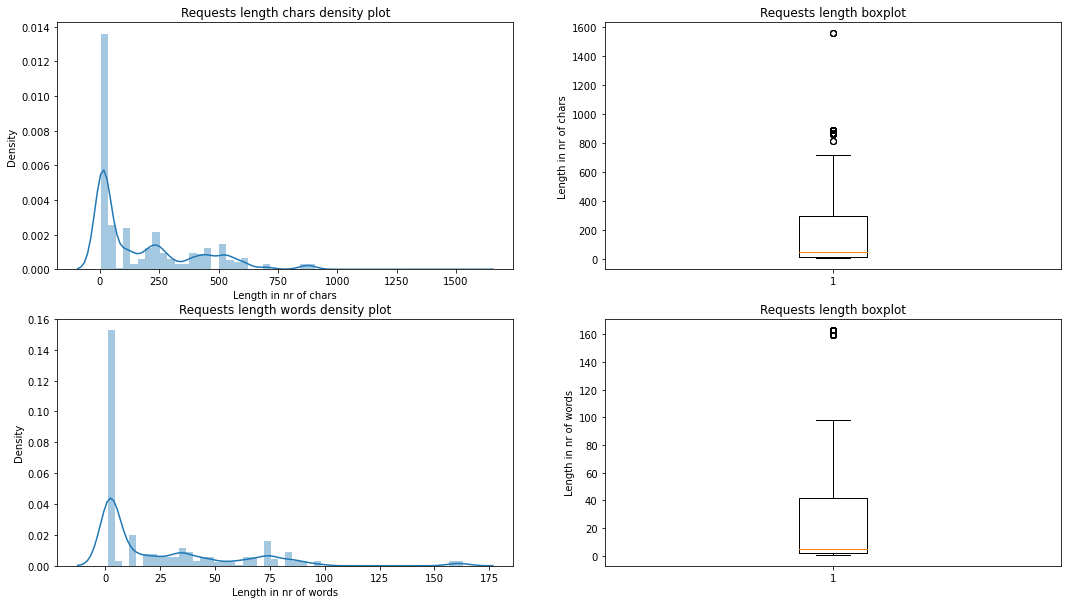

In [939]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(size, hist=True)
ax1.set_title("Requests length chars density plot")
ax1.set_ylabel("Density")
ax1.set_xlabel("Length in nr of chars")
ax1 = plt.subplot2grid((2,2),(0,1))
ax1.boxplot(size)
ax1.set_title("Requests length boxplot")
ax1.set_ylabel("Length in nr of chars")
ax1.set_xlabel("")

ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(words, hist=True)
ax1.set_title("Requests length words density plot")
ax1.set_ylabel("Density")
ax1.set_xlabel("Length in nr of words")
ax1 = plt.subplot2grid((2,2),(1,1))
ax1.boxplot(words)
ax1.set_title("Requests length boxplot")
ax1.set_ylabel("Length in nr of words")
ax1.set_xlabel("")
plt.show()


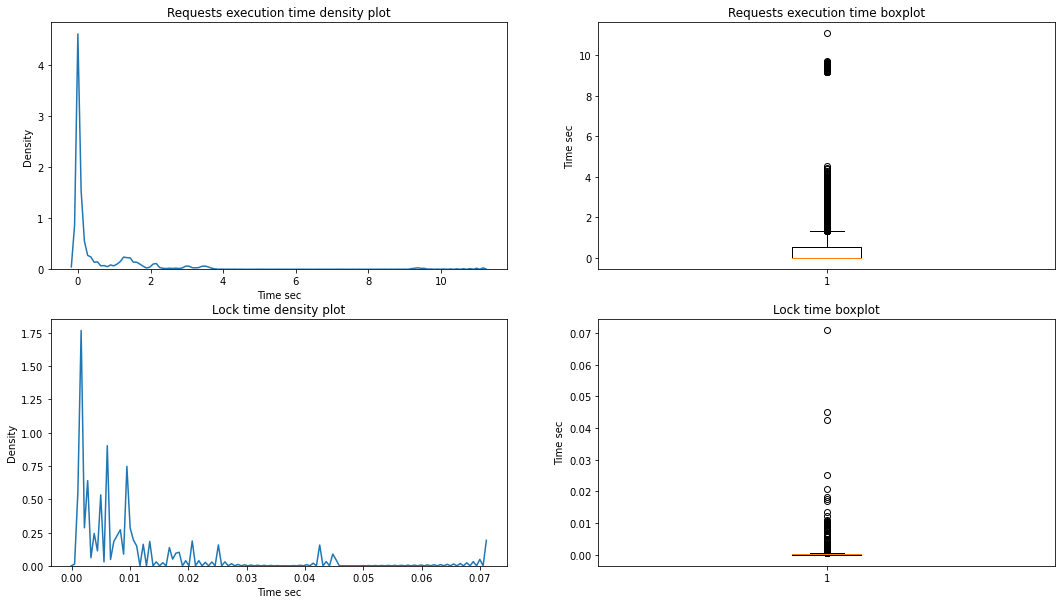

In [903]:
queryTime=slowLog['query_time']
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(queryTime,hist=False)
ax1.set_title("Requests execution time density plot")
ax1.set_ylabel("Density")
ax1.set_xlabel("Time sec")
ax1 = plt.subplot2grid((2,2),(0,1))
ax1.boxplot(queryTime)
ax1.set_title("Requests execution time boxplot")
ax1.set_ylabel("Time sec")
ax1.set_xlabel("")


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(slowLog['lock_time'],hist=False)
ax1.set_title("Lock time density plot")
ax1.set_ylabel("Density")
ax1.set_xlabel("Time sec")
ax1 = plt.subplot2grid((2,2),(1,1))
ax1.boxplot(slowLog['lock_time'])
ax1.set_title("Lock time boxplot")
ax1.set_ylabel("Time sec")
ax1.set_xlabel("")

plt.show()

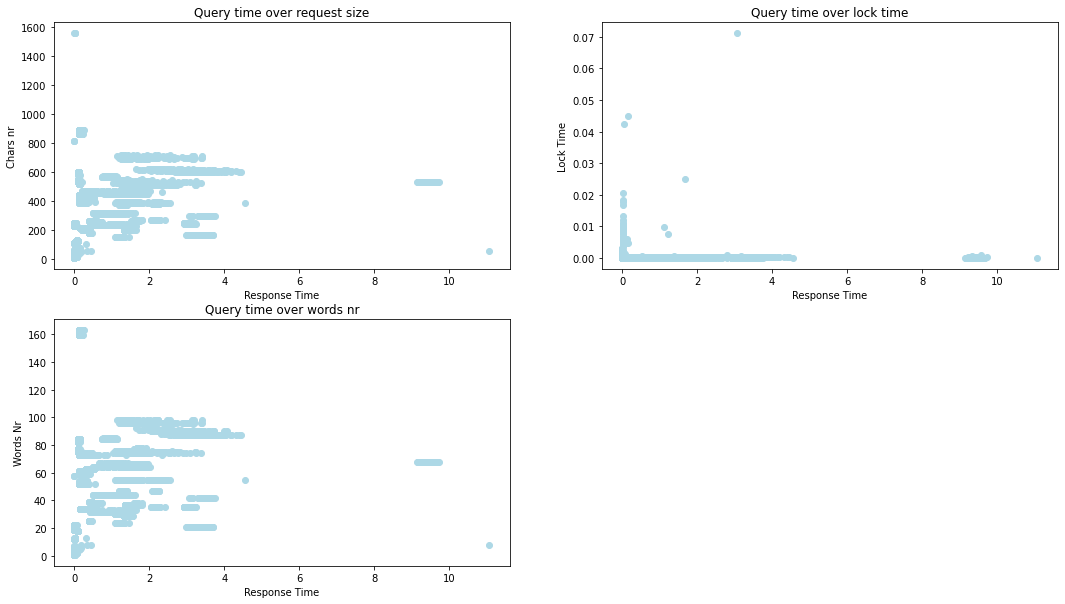

In [943]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1.scatter(queryTime,size, color="lightblue")
ax1.set_title("Query time over request size")
ax1.set_xlabel("Response Time")
ax1.set_ylabel("Chars nr")
ax1 = plt.subplot2grid((2,2),(0,1))
ax1.scatter(queryTime,slowLog['lock_time'], color="lightblue")
ax1.set_title("Query time over lock time")
ax1.set_xlabel("Response Time")
ax1.set_ylabel("Lock Time")


ax1 = plt.subplot2grid((2,2),(1,0))
ax1.scatter(queryTime,words, color="lightblue")
ax1.set_title("Query time over words nr")
ax1.set_xlabel("Response Time")
ax1.set_ylabel("Words Nr")
plt.show()

In [942]:

print("Pearson correlation chars nr: "+str(size.corr(queryTime)))
print("Pearson correlation words nr: "+str(words.corr(queryTime)))
print("Pearson correlation lock_time nr: "+str(slowLog['lock_time'].corr(queryTime)))

Pearson correlation chars nr: 0.4510769083602558
Pearson correlation words nr: 0.39594319500583713
Pearson correlation lock_time nr: 0.02468982808669662


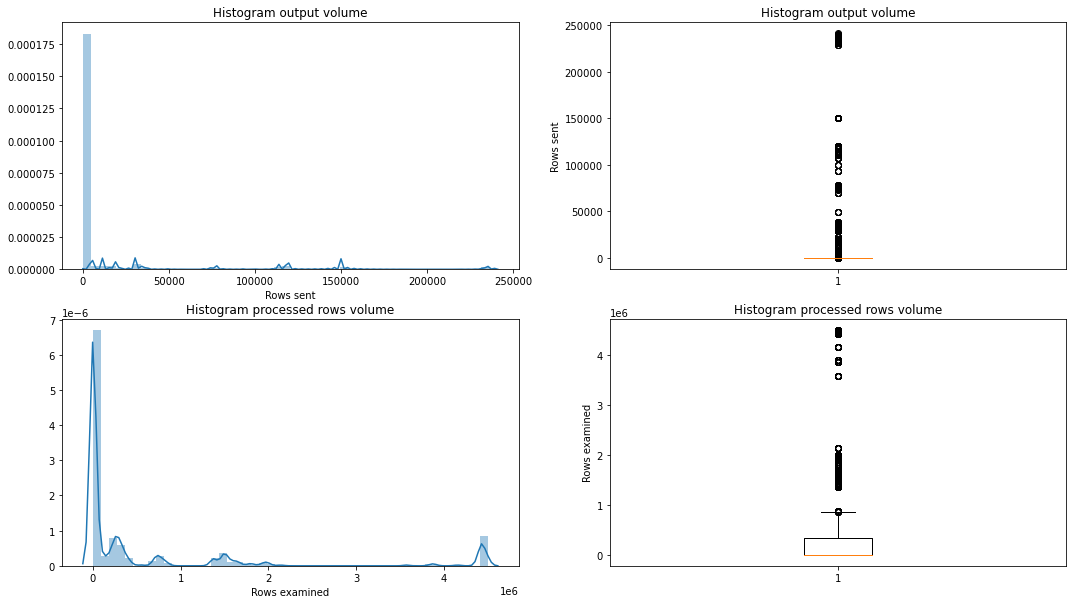

In [824]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(slowLog['rows_sent'],hist=True)
ax1.set_title("Histogram output volume")
ax1.set_ylabel("")
ax1.set_xlabel("Rows sent")
ax1 = plt.subplot2grid((2,2),(0,1))
ax1.boxplot(slowLog['rows_sent'])
ax1.set_title("Histogram output volume")
ax1.set_ylabel("Rows sent")
ax1.set_xlabel("")

ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(slowLog['rows_examined'],hist=True)
ax1.set_title("Histogram processed rows volume")
ax1.set_ylabel("")
ax1.set_xlabel("Rows examined")
ax1 = plt.subplot2grid((2,2),(1,1))
ax1.boxplot(slowLog['rows_examined'])
ax1.set_title("Histogram processed rows volume")
ax1.set_ylabel("Rows examined")
ax1.set_xlabel("")
plt.show()

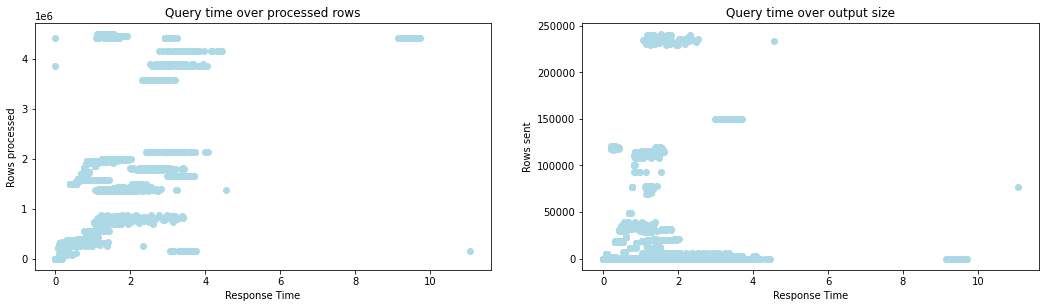

In [833]:
fig = plt.figure(figsize=(18,10))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1.scatter(queryTime,slowLog['rows_examined'], color="lightblue")
ax1.set_title("Query time over processed rows")
ax1.set_xlabel("Response Time")
ax1.set_ylabel("Rows processed")
ax1 = plt.subplot2grid((2,2),(0,1))
ax1.scatter(queryTime,slowLog['rows_sent'], color="lightblue")
ax1.set_title("Query time over output size")
ax1.set_xlabel("Response Time")
ax1.set_ylabel("Rows sent")
plt.show()

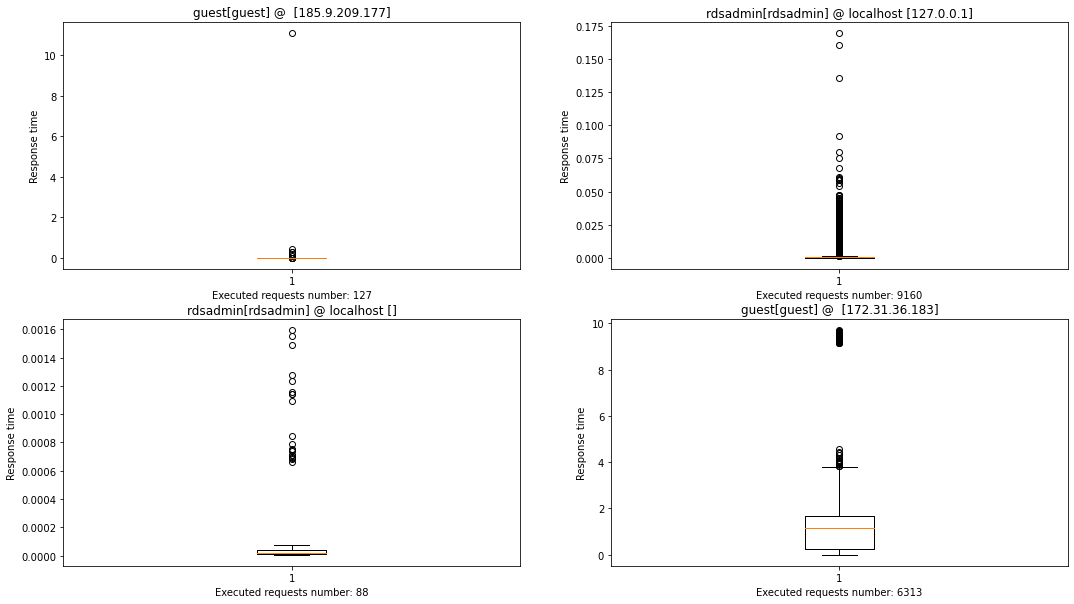

In [888]:
def perUserStats(df):
    names=df['user_host'].unique()
    loc=[(0,0),(0,1),(1,0),(1,1)]
    fig = plt.figure(figsize=(18,10))
    for i in range(len(names)):
        ax1 = plt.subplot2grid((2,2),loc[i])
        mm=df.loc[df['user_host']==names[i]]['query_time'].T
        ax1.boxplot(mm)
        ax1.set_title(names[i])
        ax1.set_xlabel("Executed requests number: "+ str(len(mm)))
        ax1.set_ylabel("Response time")
    plt.show()
    
perUserStats(slowLog)


In [223]:
shortestQuery= min(slowLog['query_time'])
shText=slowLog.loc[slowLog['query_time']==shortestQuery]["sql_text"]
print(shText.values[0])
slowLog.loc[slowLog['sql_text']==shText.values[0]]['query_time'].describe()

Ping


count   16.000000000
mean     0.000026125
std      0.000009986
min      0.000007000
25%      0.000019500
50%      0.000022500
75%      0.000035250
max      0.000045000
Name: query_time, dtype: float64

In [996]:
slowLog[slowLog['sql_text'].str.lower().str.contains('\(\ select ')]['query_time'].describe()


count   2850.000000000
mean       1.111708940
std        1.141573501
min        0.093502000
25%        0.168531750
50%        0.406983500
75%        2.103261250
max        4.447489000
Name: query_time, dtype: float64

In [997]:
slowLog[slowLog['sql_text'].str.lower().str.contains('select *')]['query_time'].describe()

count   15118.000000000
mean        0.552616511
std         1.227443161
min         0.000048000
25%         0.000443000
50%         0.001191000
75%         0.534373750
max        11.073425000
Name: query_time, dtype: float64

In [1002]:
slowLog[slowLog['sql_text'].str.lower().str.contains('-- using')]['query_time'].describe()

count   300.000000000
mean      6.203185047
std       3.197644010
min       2.913935000
25%       3.008214750
50%       6.192488500
75%       9.375888250
max       9.719274000
Name: query_time, dtype: float64

In [999]:
slowLog[slowLog['sql_text'].str.lower().str.contains('mysql.slow_log')]['query_time'].describe()


count    7.000000000
mean     1.782076429
std      4.099784567
min      0.000078000
25%      0.153426500
50%      0.319530000
75%      0.387324500
max     11.073425000
Name: query_time, dtype: float64

In [84]:
slowLog.loc[slowLog['query_time']>8]['sql_text'].iloc[0]


'select * from mysql.slow_log order by start_time desc'

In [800]:
warn=slowLog[slowLog['sql_text'].str.len()>500]
warn= warn[warn['sql_text'].str.len()<1500]
print(warn.shape)
warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

(1953, 12)


count   1953.000
mean       1.820
std        2.422
min        0.000
25%        0.129
50%        1.283
75%        2.218
max        9.719
Name: query_time, dtype: float64

In [ ]:
warn=slowLog[slowLog['sql_text'].str.startswith("select @@")]

warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

In [571]:
warn=slowLog[slowLog['sql_text'].str.startswith("select @@")]

warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

count    1132.000000
mean        0.000529
std         0.000440
min         0.000064
25%         0.000077
50%         0.000404
75%         0.000926
max         0.003598
Name: query_time, dtype: float64

In [570]:
warn=slowLog[slowLog['sql_text'].str.startswith("set")]

warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

count    42.000000
mean      0.000162
std       0.000251
min       0.000035
25%       0.000074
50%       0.000087
75%       0.000115
max       0.001192
Name: query_time, dtype: float64

In [554]:
warn=slowLog.loc[slowLog['sql_text']=="SELECT 1"]
warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

count    5413.000000
mean        0.001010
std         0.003839
min         0.000048
25%         0.000083
50%         0.000443
75%         0.000566
max         0.061180
Name: query_time, dtype: float64

In [552]:
warn['query_time'].map(lambda x: float(str(x)[6:])).describe()

count    35.000000
mean      0.000089
std       0.000024
min       0.000055
25%       0.000067
50%       0.000088
75%       0.000107
max       0.000130
Name: query_time, dtype: float64

In [227]:
import requests

url = 'http://localhost:5000/predict'
r = requests.post(url,json={'data':'ping'})

print(r.json())

ConnectionError: HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001AB010A3BB0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))